<a href="https://colab.research.google.com/github/YasminaNasser/Stroke-Prediction-Data-Mining/blob/main/Stroke_Prediction_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members:**


- Nour Tarek Adel 21p0399
- Farida Waleed Fakhry 21P0167
- Malak Ahmed Yehia 2001350
- Yomna Mohamed Hachem 21P0189
- Yasmina Nasser Hamam 21P0211
- Brwana Ahmed Mourad 20P1346

**GitHub Repo:**

[Stroke-Prediction-Repo](https://colab.research.google.com/github/YasminaNasser/Stroke-Prediction-Data-Mining/blob/google-collab/Stroke_Prediction.ipynb#scrollTo=Jsudh3c5EcU5)



In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import files
# upload =files.upload()

# Step 1 | Data overview


In [ ]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- id: Identification number of the individual.
- gender: Gender of the individual.
- hypertension: Health related parameter, does person have hypertension.
- heart_disease: Health related parameter, does person have heart disease.
- ever_married: Personal information, is person married on not?
- work_type: Nature of work place.
- Residence_type: Residence type of the individual.
- avg_glucose_level: average glucose level in blood for the individual.
- bmi: body mass index of the individual.
- smoking_status: Habitual information. Current smoking status of individual.
- stroke: Our taget, is person suffered heart attack?

In [ ]:
# Display the shape of the DataFrame after removing duplicates
df.shape

(5110, 12)

In [ ]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

 We have 5110 instances with the 11 features and 1 output variable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
def column_info(df):
  cols=[]
  dtypes=[]
  unique_values=[]
  nunique_values=[]

#loop ala kol columns
  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtype)
    unique_values.append(df[col].unique())
    nunique_values.append(df[col].nunique())

#return dataframe fe dictionnaries
  return pd.DataFrame({'column_name':cols,
                        'data_type':dtypes,
                        'unique_values':unique_values,
                        'nunique_values':nunique_values})

column_info(df)

,column_name,data_type,unique_values,nunique_values
0,id,int64,"[9046, 51676, 31112, 60182, 1665, 56669, 53882...",5110
1,gender,object,"[Male, Female, Other]",3
2,age,float64,"[67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69....",104
3,hypertension,int64,"[0, 1]",2
4,heart_disease,int64,"[1, 0]",2
5,ever_married,object,"[Yes, No]",2
6,work_type,object,"[Private, Self-employed, Govt_job, children, N...",5
7,Residence_type,object,"[Urban, Rural]",2
8,avg_glucose_level,float64,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2...",3979
9,bmi,float64,"[36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8...",418


### 1.1 Describe Data

In [ ]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [ ]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Initial Insights:**

Data from bmi feature is missing.

Both Categorical and numerical features are present.

- Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
- Binary Numerical Features: hypertension,heart_disease, stroke
- Continous Numerical Features: age, avg_glucose_level, bmi

Most of the data is categorical which need a special attention to visualize those.

Feature extraction can be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.

### 1.2  Categorical Features

In [ ]:
# Extract categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("------------------Extracting Categorical Features------------------")
print("Categorical Features:", categorical_features)


------------------Extracting Categorical Features------------------
Categorical Features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
# Process each categorical feature
for feature in categorical_features:
    print(f"\nProcessing Feature: {feature}")

    # Get value counts for the feature
    value_counts = df[feature].value_counts(dropna=False)
    print(f"Value Counts:\n{value_counts}")



Processing Feature: gender
Value Counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Processing Feature: ever_married
Value Counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Processing Feature: work_type
Value Counts:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Processing Feature: Residence_type
Value Counts:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Processing Feature: smoking_status
Value Counts:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


# Step 2 | Preprocessing Techniques


## 2.1 Check Nulls

In [ ]:
# check null
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


the missing values of bmi are nulls.

In [ ]:
print((df.isna().sum()/len(df))*100)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


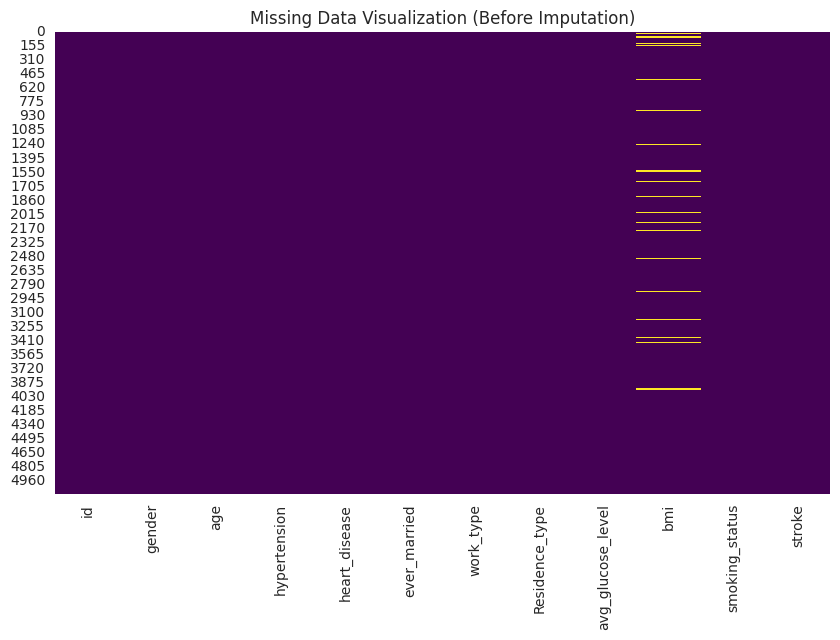

In [ ]:
# Visualization of missing data before imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data Visualization (Before Imputation)')
plt.show()

## 2.1 Imputations of nulls

### 2.1.1 Extracting Numerical Features

In [ ]:
# Identify numerical features (excluding the last column)
numerical_features = df.iloc[:, :-1].select_dtypes(include=[np.number]).columns.tolist()

print("------------------ Extracting Numerical Features ------------------")
print(numerical_features)

# Create a DataFrame with only numerical features (excluding the target column)
dataframe_N = df[numerical_features]

print("------------------ Numerical DataFrame ------------------------")
dataframe_N.head()

------------------ Extracting Numerical Features ------------------
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
------------------ Numerical DataFrame ------------------------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
1,51676,61.0,0,0,202.21,NaN
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0


### 2.1.2 Impute with mean

In [ ]:
# Replace NaN values with the mean of each column
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dataframe_N_imputed = imp_mean.fit_transform(dataframe_N)

# Convert the NumPy array back to a DataFrame with the original column names
dataframe_N_imputed = pd.DataFrame(dataframe_N_imputed, columns=numerical_features)

print("------------------ Data After Imputation ------------------------")
dataframe_N_imputed.head()


------------------ Data After Imputation ------------------------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046.0,67.0,0.0,1.0,228.69,36.600000
1,51676.0,61.0,0.0,0.0,202.21,28.893237
2,31112.0,80.0,0.0,1.0,105.92,32.500000
3,60182.0,49.0,0.0,0.0,171.23,34.400000
4,1665.0,79.0,1.0,0.0,174.12,24.000000


### 2.1.3 Normalize after imputation

In [ ]:
# Normalize the data to a range of [0, 1]
normalizer = MinMaxScaler(feature_range=(0, 1))
dataframe_N_normalized = normalizer.fit_transform(dataframe_N_imputed)

# Convert the normalized array back to a DataFrame with the original column names
dataframe_N_normalized = pd.DataFrame(dataframe_N_normalized, columns=numerical_features)

print("------------------ Data After Normalization ------------------------")
dataframe_N_normalized.head()

------------------ Data After Normalization ------------------------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.123214,0.816895,0.0,1.0,0.801265,0.301260
1,0.708205,0.743652,0.0,0.0,0.679023,0.212981
2,0.426015,0.975586,0.0,1.0,0.234512,0.254296
3,0.824928,0.597168,0.0,0.0,0.536008,0.276060
4,0.021929,0.963379,1.0,0.0,0.549349,0.156930


###2.1.4 Data After Handling Missing Values and Normalization

In [ ]:
# Update the original dataset with the normalized numerical features
df[numerical_features] = dataframe_N_normalized

print("------------------- Data After Handling Missing Values and Normalization ---------------")
df.head()

------------------- Data After Handling Missing Values and Normalization ---------------


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,0.708205,Female,0.743652,0.0,0.0,Yes,Self-employed,Rural,0.679023,0.212981,never smoked,1
2,0.426015,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,0.824928,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,0.021929,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


#2.2 Check Duplicates

In [ ]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

print("\n------------------Checking for Duplicate Rows------------------")
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
    print("Duplicate Rows:\n", duplicate_rows)
else:
    print("No exact duplicate rows found.")



------------------Checking for Duplicate Rows------------------
No exact duplicate rows found.


## 2.3 Check Coorelation between features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables directly in the original DataFrame
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Encoding categorical column: {col}")
    df[col] = LabelEncoder().fit_transform(df[col])

# Display the first few rows of the updated DataFrame
df.head()


Encoding categorical column: gender
Encoding categorical column: ever_married
Encoding categorical column: work_type
Encoding categorical column: Residence_type
Encoding categorical column: smoking_status


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1,0.816895,0.0,1.0,1,2,1,0.801265,0.301260,1,1
1,0.708205,0,0.743652,0.0,0.0,1,3,0,0.679023,0.212981,2,1
2,0.426015,1,0.975586,0.0,1.0,1,2,0,0.234512,0.254296,2,1
3,0.824928,0,0.597168,0.0,0.0,1,2,1,0.536008,0.276060,3,1
4,0.021929,0,0.963379,1.0,0.0,1,3,0,0.549349,0.156930,2,1


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print all the features in the correlation matrix
print("\nFeatures in the Correlation Matrix:")
print(corr_matrix.columns.tolist())


Features in the Correlation Matrix:
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [ ]:
# Display the correlation matrix as a DataFrame
corr_matrix

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.002999,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,0.002999,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947


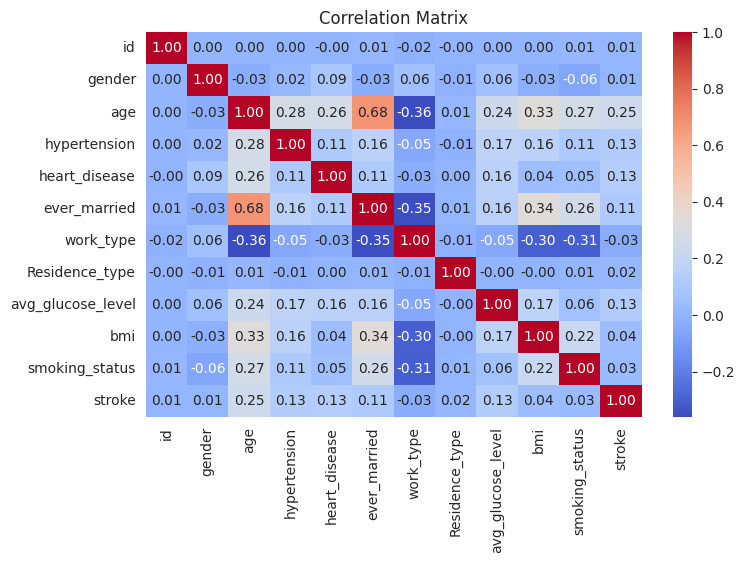

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

ever_married and age have strong relation.



Drop ID Column

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)


Highly Correlated

In [ ]:
# Initialize parameters
threshold = 8
reason = "The column is detected as not contributing significantly to other features."
columns_to_drop = []

# Iterate over each column to check its correlation with others
for column in corr_matrix.columns:
    # Get correlations of the current column with all others (excluding itself)
    column_correlation = corr_matrix[column].drop(column)

    # Check if all correlations are below the threshold
    if all(abs(column_correlation) > threshold) and column not in columns_to_drop:
        columns_to_drop.append(column)
        print(f"Detected '{column}' column as not contributing significantly to other columns, removing it.")
        print(f"Reason: {reason}")

# Display the list of columns to drop
print(f"Columns to drop: {columns_to_drop}")


Columns to drop: []


Highly uncorrelated

In [ ]:
# Initialize parameters
threshold = 0.003550
reason = "The column is detected as not contributing significantly to other features."
columns_to_drop = []

# Iterate over each column to check its correlation with others
for column in corr_matrix.columns:
    # Get correlations of the current column with all others (excluding itself)
    column_correlation = corr_matrix[column].drop(column)

    # Check if all correlations are below the threshold
    if all(abs(column_correlation) < threshold) and column not in columns_to_drop:
        columns_to_drop.append(column)
        print(f"Detected '{column}' column as not contributing significantly to other columns, removing it.")
        print(f"Reason: {reason}")

# Display the list of columns to drop
print(f"Columns to drop: {columns_to_drop}")


Columns to drop: []


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0.0,1.0,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0.0,0.0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0.0,1.0,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0.0,0.0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1.0,0.0,1,3,0,0.549349,0.156930,2,1


##2.3 Saving Dataset After Preprocessing

In [ ]:
df.to_csv('dataset_after_preprocessing.csv', index=False)

# Step 3 | Outliers Detection

In this analysis, both **capping** and **removing** outliers will be implemented to address extreme values in the dataset.

The goal is to evaluate and compare the impact of these two methods on the data distribution and overall trends.

By *capping outliers*, extreme values are adjusted to *lie within statistically acceptable bounds*, preserving all data points while mitigating their influence on analysis.

Conversely, *removing outlier*s entirely excludes rows with extreme values, simplifying the dataset but *potentially discarding valuable information*.

 By applying both techniques to the same dataset and visualizing the results, we can better understand their respective **advantages**, **limitations**, and the contexts in which each method is more appropriate.

In [ ]:
df_preprocessed=pd.read_csv("/content/dataset_after_preprocessing.csv")


<ipython-input-518-5abc53ca845b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_preprocessed[col], shade=True)


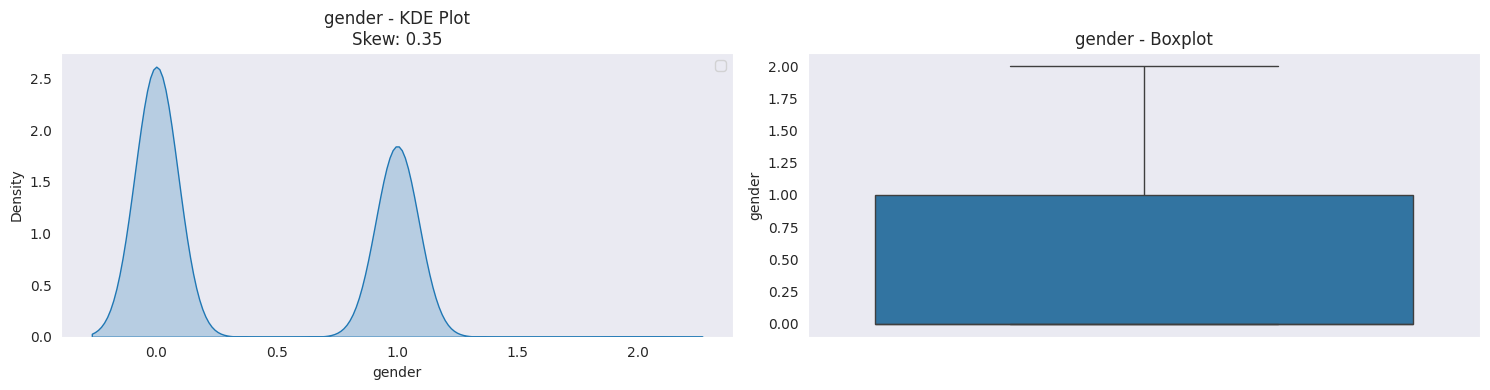

<ipython-input-518-5abc53ca845b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_preprocessed[col], shade=True)


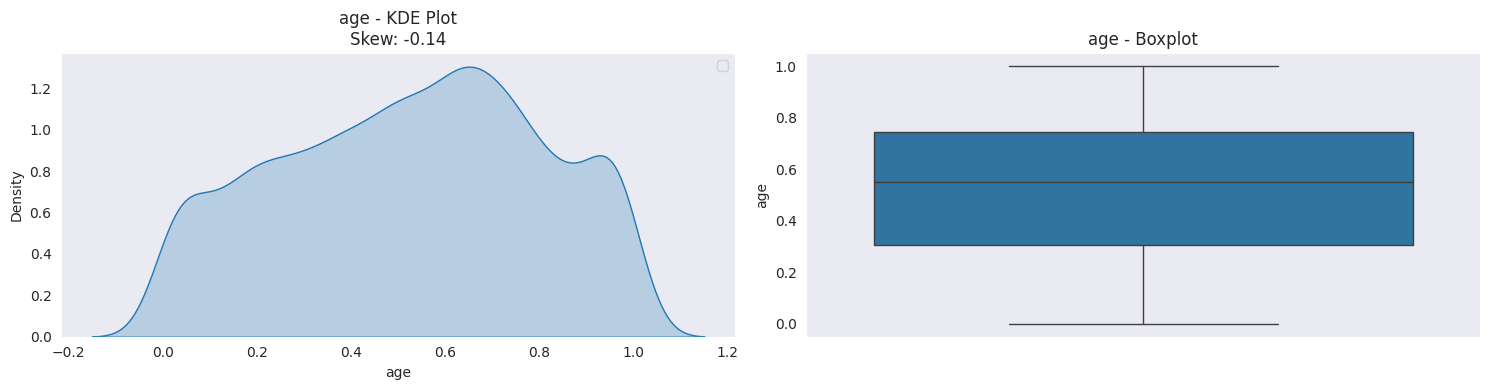

<ipython-input-518-5abc53ca845b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_preprocessed[col], shade=True)


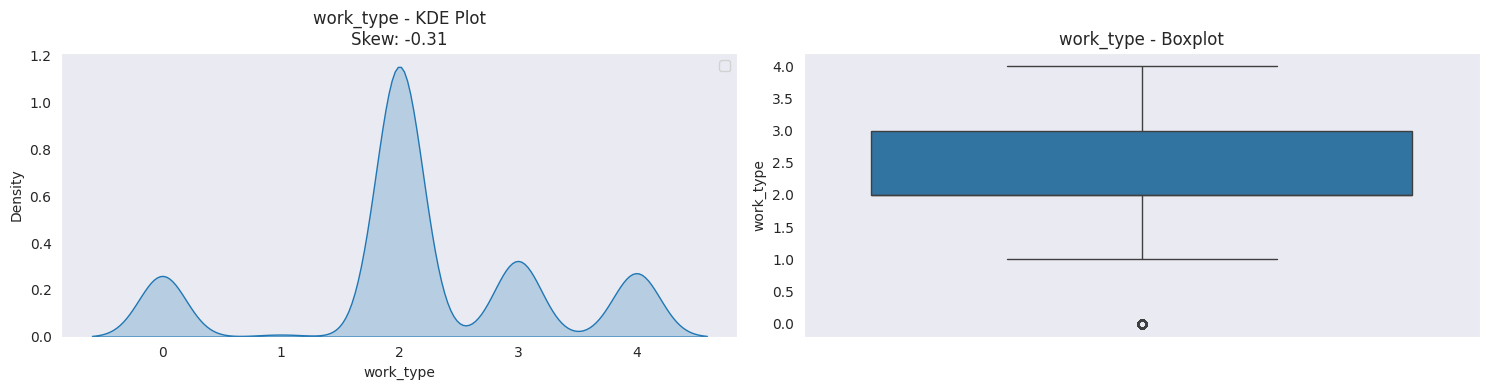

<ipython-input-518-5abc53ca845b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_preprocessed[col], shade=True)


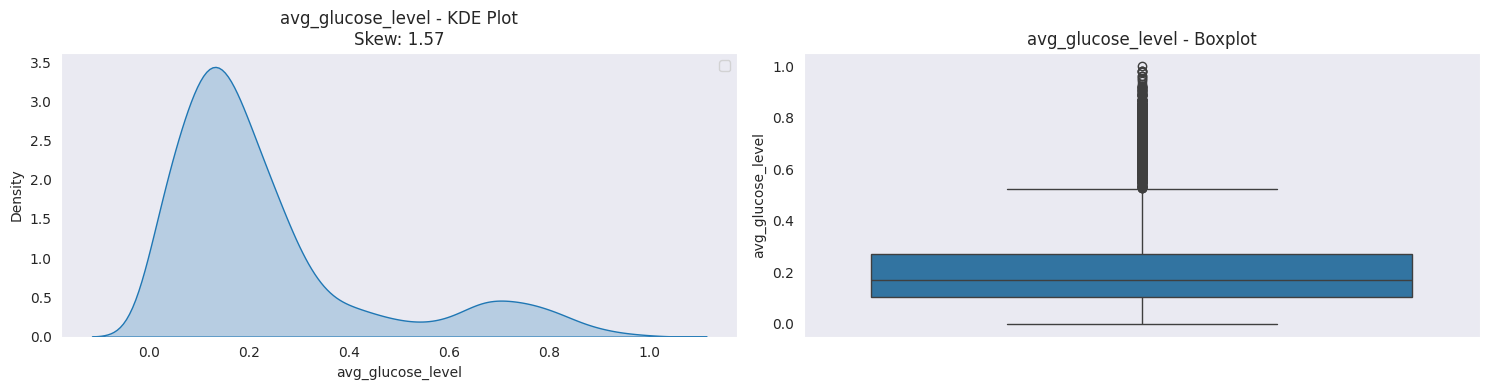

<ipython-input-518-5abc53ca845b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_preprocessed[col], shade=True)


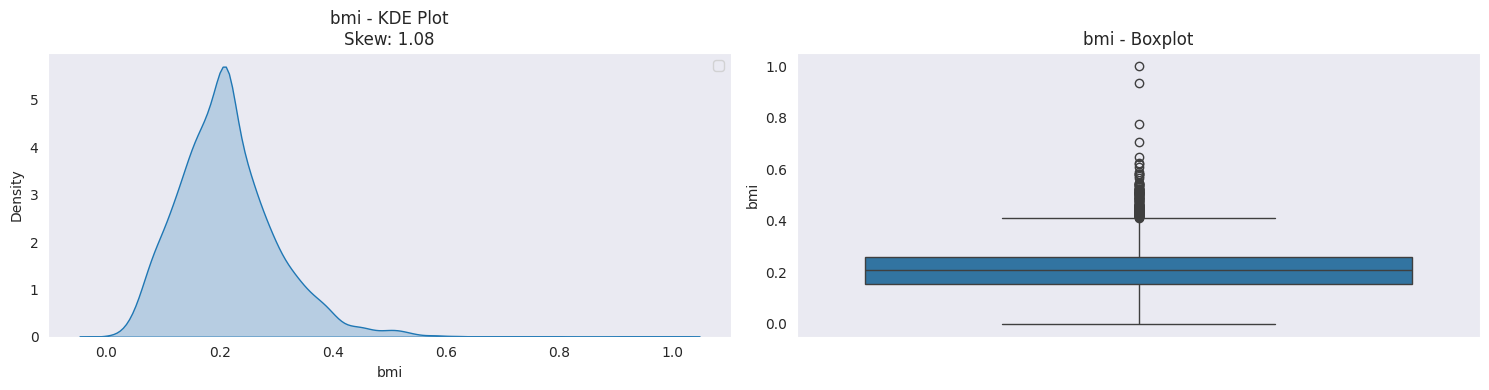

<ipython-input-518-5abc53ca845b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_preprocessed[col], shade=True)


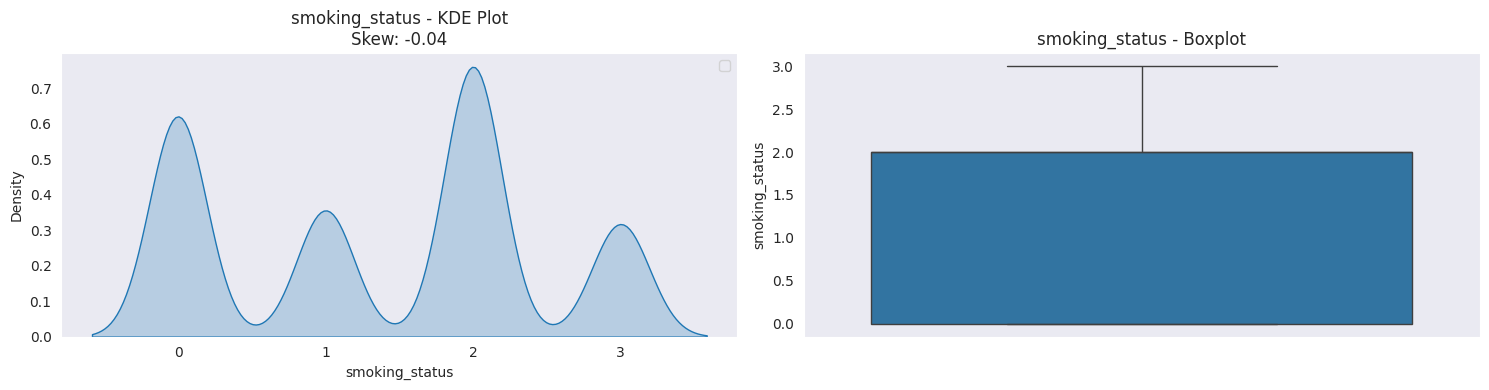

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('dark')

# Plot only for columns with more than 2 unique values and exclude 'stroke'
for col in df_preprocessed:
    if df_preprocessed[col].nunique() > 2 and col != 'stroke':  # Exclude binary columns and 'stroke'
        plt.figure(figsize=(15, 4))

        # KDE plot
        plt.subplot(1, 2, 1)
        sns.kdeplot(df_preprocessed[col], shade=True)
        plt.title(f"{col} - KDE Plot\nSkew: {np.round(df_preprocessed[col].skew(), 2)}")
        plt.legend()

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(df_preprocessed[col])
        plt.title(f"{col} - Boxplot")

        plt.tight_layout()
        plt.show()


### 3.1 Detect Using IQR

In [ ]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)


In [ ]:
# Calculating the percentage of outliers in each numerical column
iqr_flages = pd.DataFrame()

for column in df_preprocessed:
    if df_preprocessed[column].nunique() > 2:  # Exclude columns with only two unique values
        outliers = detect_outliers_iqr(df[column])
        iqr_flages[column] = outliers
        percentage = len(outliers[outliers == True]) / len(df[column]) * 100
        print(f"{column}: {percentage:.2f}% outliers")

iqr_out_indx_DF = iqr_flages.any(axis=1)
percentage = len(iqr_out_indx_DF[iqr_out_indx_DF == True]) / len(df[column]) * 100
print(f"Total: {percentage:.2f}% outliers")


gender: 0.00% outliers
age: 0.00% outliers
work_type: 12.86% outliers
avg_glucose_level: 12.27% outliers
bmi: 2.47% outliers
smoking_status: 0.00% outliers
Total: 24.87% outliers


In [ ]:
# Print the frequency of each value in the 'gender' column
print(df_preprocessed['gender'].value_counts())


gender
0    2994
1    2115
2       1
Name: count, dtype: int64


### 3.2.2 Detect Using Z-score

In [ ]:
def detect_outliers_zscore(column):
    colmean =  column.mean()
    colstd = column.std(ddof=0)
    DFZ = ((column - colmean)/colstd).copy()
    outliers = ((DFZ < -3) | (DFZ > 3))
    return outliers

In [ ]:
# Print dataset info before handling outliers
print("Before handling outliers:")
df_preprocessed.info()

zscore_flags = pd.DataFrame()

# Loop through columns and detect outliers
for column in df_preprocessed:
    if df_preprocessed[column].nunique() > 2:  # Exclude columns with only two unique values
        outliers = detect_outliers_zscore(df[column])
        zscore_flags[column] = outliers
        percentage = len(outliers[outliers == True]) / len(df[column]) * 100
        print(f"{column}: {percentage:.2f}% outliers")

# Flatten the zscore_flags DataFrame to identify rows with any outlier
zscore_flags_any = zscore_flags.any(axis=1)

# Remove rows with outliers (where any column has outliers)
df_cleaned = df_preprocessed[~zscore_flags_any]

# Print out the total percentage of outliers removed
percentage_removed = len(zscore_flags_any[zscore_flags_any == True]) / len(df_preprocessed) * 100
print(f"Total: {percentage_removed:.2f}% outliers removed")

# Print dataset info after handling outliers
print("\nAfter handling outliers:")
df_cleaned.info()

# Display the cleaned DataFrame (optional)
df_cleaned.head()


Before handling outliers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 439.3 KB
gender: 0.02% outliers
age: 0.00% outliers
work_type: 0.00% outliers
avg_glucose_level: 0.96% outliers
bmi: 1.15% outliers
smoking_status: 0.00% outliers
Total: 2.13% outliers removed

After 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0.0,1.0,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0.0,0.0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0.0,1.0,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0.0,0.0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1.0,0.0,1,3,0,0.549349,0.156930,2,1


In [ ]:
df_cleaned.to_csv('dataset_after_handling_outliers.csv', index=False)

Regarding the avg_glucose_level , we used 2 measures of outlier detection since deleting 24.87% of our total dataset seemed too much and unreasonable, so removing outliers in this case would lead in loss of important information.

That's why we will focus more on the Z-Score outlier detection cleaned dataset moving forward

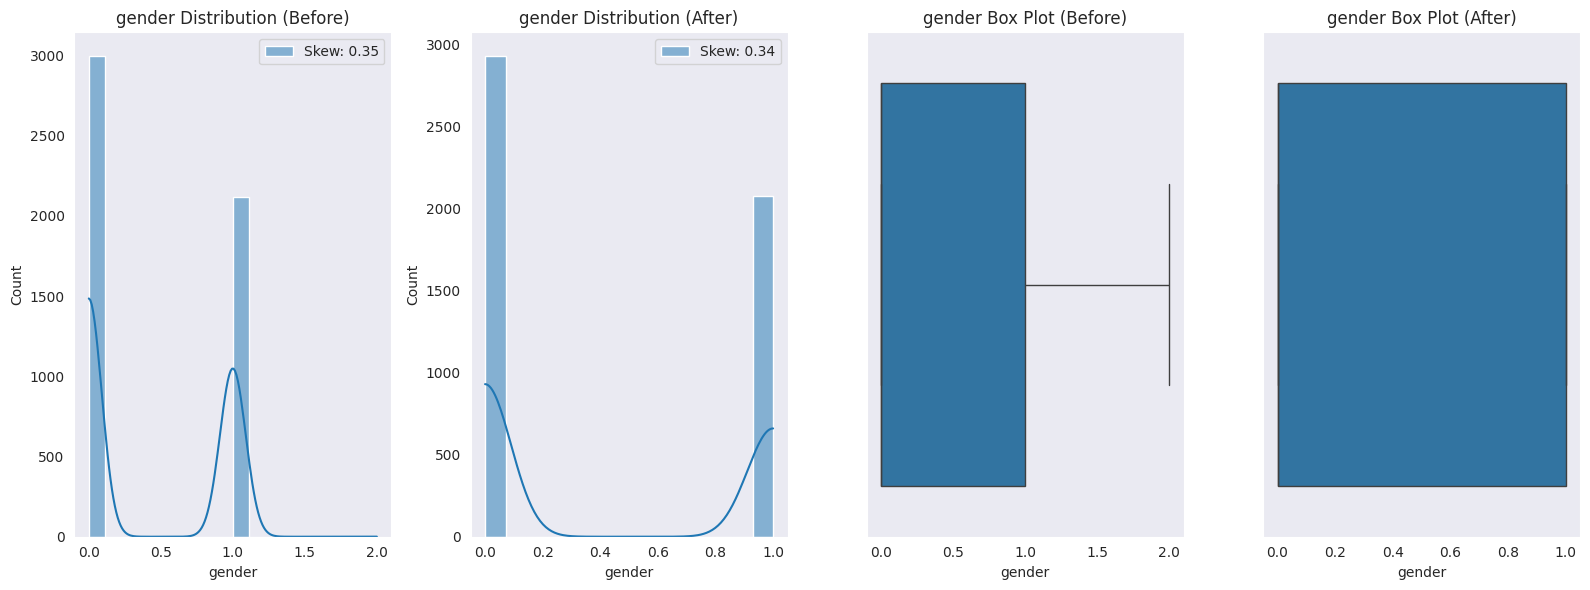

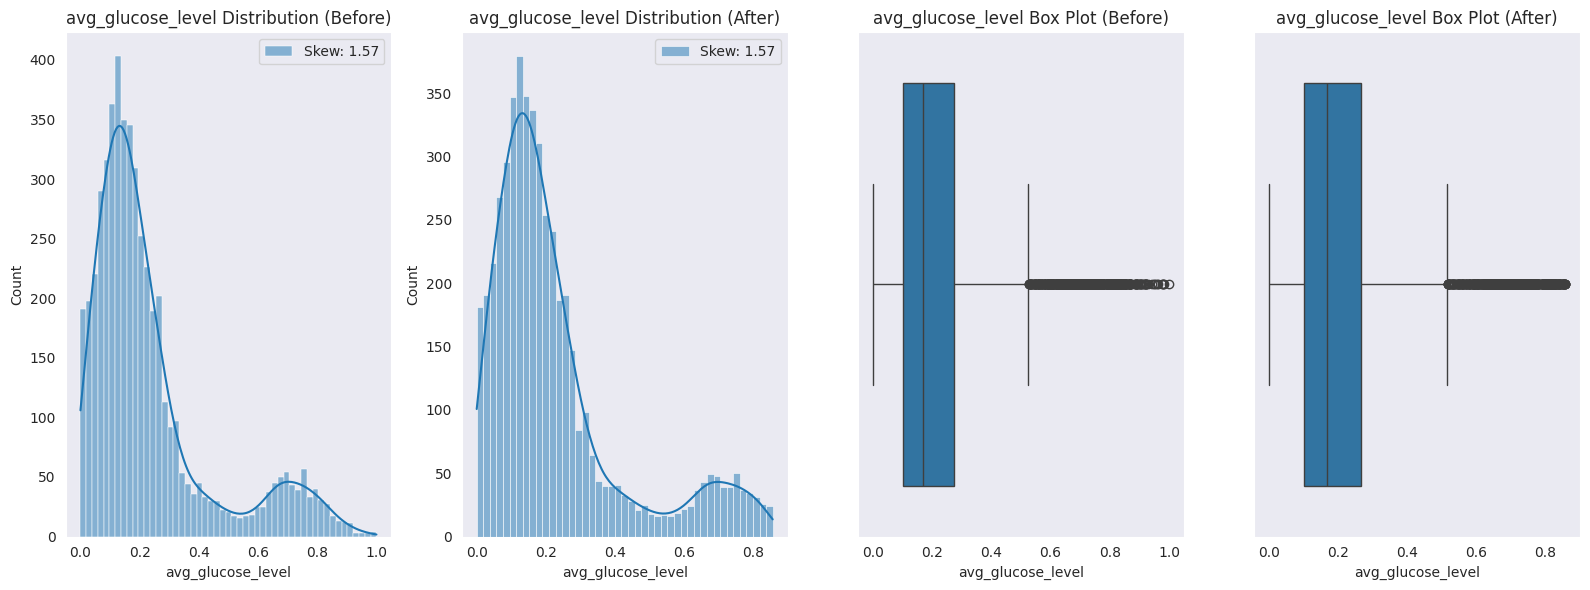

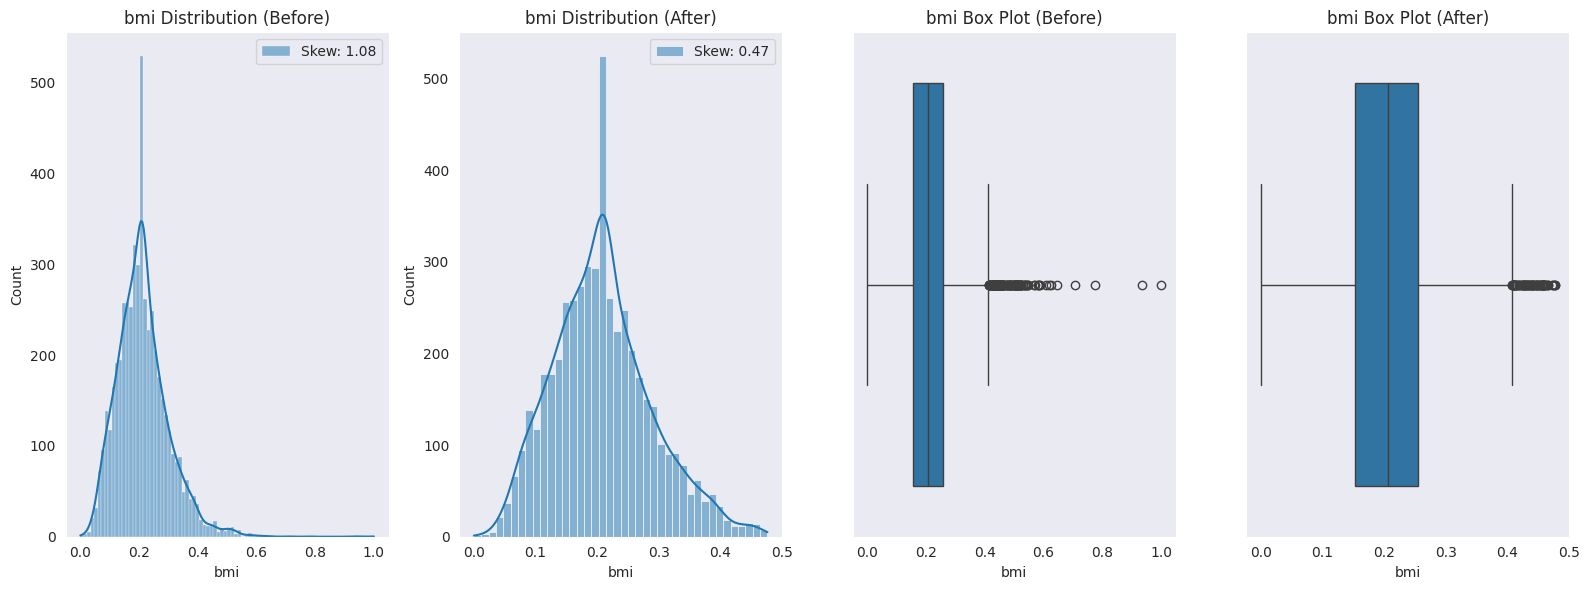

In [ ]:
# Identify columns that had outliers detected
columns_with_outliers = [col for col in zscore_flags if zscore_flags[col].any()]

# Plot distributions and box plots for columns with outliers
for col in columns_with_outliers:
    plt.figure(figsize=(16, 6))

    # Distribution plot before outlier removal
    plt.subplot(141)
    sns.histplot(df_preprocessed[col], kde=True, label="Skew: " + str(np.round(df_preprocessed[col].skew(), 2)))
    plt.title(f'{col} Distribution (Before)')
    plt.legend()

    # Distribution plot after outlier removal
    plt.subplot(142)
    sns.histplot(df_cleaned[col], kde=True, label="Skew: " + str(np.round(df_cleaned[col].skew(), 2)))
    plt.title(f'{col} Distribution (After)')
    plt.legend()

    # Box plot before outlier removal
    plt.subplot(143)
    sns.boxplot(x=df_preprocessed[col])
    plt.title(f'{col} Box Plot (Before)')

    # Box plot after outlier removal
    plt.subplot(144)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} Box Plot (After)')

    plt.tight_layout()
    plt.show()


# Step 6 | Classifiers

Loading Preprocessed and Cleaned Dataset

In [ ]:
df_ready=pd.read_csv("/content/dataset_after_preprocessing.csv")


## *splitting methods*

In [ ]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, TimeSeriesSplit
from sklearn.utils import resample
import pandas as pd
import numpy as np

def train_test_split_method(X, y, test_size=0.2, random_state=1):
    """
    Perform a simple train-test split.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def k_fold_split_method(X, y, n_splits=5, random_state=1):
    """
    Perform K-Fold Cross-Validation. Returns an iterator over train-test splits.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        yield X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

def stratified_k_fold_split_method(X, y, n_splits=5, random_state=1):
    """
    Perform Stratified K-Fold Cross-Validation. Returns an iterator over train-test splits.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, test_index in skf.split(X, y):
        yield X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]


def train_val_test_split_method(X, y, val_size=0.2, test_size=0.2, random_state=1):
    """
    Perform a Train-Validation-Test Split.
    """
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(val_size + test_size), random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (val_size + test_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

## Decision Tree Classifier

### Simple Train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


X = df_ready.drop(columns=['stroke'])  # Features
y = df_ready['stroke']  # Target column

# Split dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split_method(X, y)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train the classifier
clf = clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


# Calculate accuracy
accuracy_1 = accuracy_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display results
print("=" * 50)
print("Model Evaluation Results")
print("=" * 50)
print(f"Accuracy: {accuracy_1 * 100:.2f}%\n")

# Print classification report as a table
print("Classification Report:")
class_report_df = pd.DataFrame(class_report).transpose()
print(class_report_df.round(2), "\n")

# Display confusion matrix as a table
cm_df = pd.DataFrame(cm,
                     index=['Actual: No Stroke', 'Actual: Stroke'],
                     columns=['Predicted: No Stroke', 'Predicted: Stroke'])
print("Confusion Matrix:")
print(cm_df)
TN, FP, FN, TP = cm.ravel()
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print("=" * 50)

Model Evaluation Results
Accuracy: 90.70%

Classification Report:
              precision  recall  f1-score  support
No Stroke          0.95    0.95      0.95   962.00
Stroke             0.18    0.17      0.17    60.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.57    0.56      0.56  1022.00
weighted avg       0.90    0.91      0.91  1022.00 

Confusion Matrix:
                   Predicted: No Stroke  Predicted: Stroke
Actual: No Stroke                   917                 45
Actual: Stroke                       50                 10
False Positives (FP): 45
False Negatives (FN): 50


### Stratified__k_Fold_Split_method

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


X = df_ready.drop(columns=['stroke'])  # Features
y = df_ready['stroke']  # Target column


# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

for X_train, X_test, y_train, y_test in stratified_k_fold_split_method(X, y):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_2 = accuracy_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display results
print("=" * 50)
print("Model Evaluation Results")
print("=" * 50)
print(f"Accuracy: {accuracy_2 * 100:.2f}%\n")

# Print classification report as a table
print("Classification Report:")
class_report_df = pd.DataFrame(class_report).transpose()
print(class_report_df.round(2), "\n")

# Display confusion matrix as a table
cm_df = pd.DataFrame(cm,
                     index=['Actual: No Stroke', 'Actual: Stroke'],
                     columns=['Predicted: No Stroke', 'Predicted: Stroke'])
print("Confusion Matrix:")
print(cm_df)
TN, FP, FN, TP = cm.ravel()
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print("=" * 50)

Model Evaluation Results
Accuracy: 92.07%

Classification Report:
              precision  recall  f1-score  support
No Stroke          0.96    0.96      0.96   973.00
Stroke             0.19    0.20      0.20    49.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.58    0.58      0.58  1022.00
weighted avg       0.92    0.92      0.92  1022.00 

Confusion Matrix:
                   Predicted: No Stroke  Predicted: Stroke
Actual: No Stroke                   931                 42
Actual: Stroke                       39                 10
False Positives (FP): 42
False Negatives (FN): 39


### Train_Validation_Split


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to split data into train, validation, and test sets
def train_val_test_split_method(X, y, test_size=0.2, val_size=0.2, random_state=1):
    """
    Splits the dataset into training, validation, and testing sets.
    """
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(test_size + val_size), random_state=random_state)
    val_ratio = val_size / (test_size + val_size)  # Proportion for validation set from X_temp
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_ratio, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting the data
X = df_ready.drop(columns=['stroke'])  # Features
y = df_ready['stroke']  # Target column
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split_method(X, y)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf = clf.fit(X_train, y_train)

# Make predictions
val_pred = clf.predict(X_val)
test_pred = clf.predict(X_test)

# Evaluate Model
def evaluate_model(y_true, y_pred, dataset_name):
    """
    Evaluates the model on a given dataset and prints metrics.
    Returns the accuracy of the model.
    """
    accuracy_3 = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
    cm = confusion_matrix(y_true, y_pred)

    # Display results
    print("=" * 50)
    print(f"{dataset_name} Evaluation Results")
    print("=" * 50)
    print(f"Accuracy: {accuracy_3 * 100:.2f}%\n")

    # Print classification report as a table
    class_report_df = pd.DataFrame(class_report).transpose()
    print("Classification Report:")
    print(class_report_df.round(2), "\n")

    # Display confusion matrix as a table
    cm_df = pd.DataFrame(cm,
                         index=['Actual: No Stroke', 'Actual: Stroke'],
                         columns=['Predicted: No Stroke', 'Predicted: Stroke'])
    print("Confusion Matrix:")
    print(cm_df)
    TN, FP, FN, TP = cm.ravel()
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print("=" * 50)

    # Return the accuracy for comparison
    return accuracy_3

# Evaluate on Validation Set and Test Set
val_accuracy = evaluate_model(y_val, val_pred, "Validation Set")
test_accuracy = evaluate_model(y_test, test_pred, "Test Set")

# Compare Accuracies
print("\nComparison of Accuracies:")
print(f"Validation Set Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")


Validation Set Evaluation Results
Accuracy: 91.98%

Classification Report:
              precision  recall  f1-score  support
No Stroke          0.95    0.96      0.96   971.00
Stroke             0.16    0.14      0.15    51.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.56    0.55      0.55  1022.00
weighted avg       0.92    0.92      0.92  1022.00 

Confusion Matrix:
                   Predicted: No Stroke  Predicted: Stroke
Actual: No Stroke                   933                 38
Actual: Stroke                       44                  7
False Positives (FP): 38
False Negatives (FN): 44
Test Set Evaluation Results
Accuracy: 90.31%

Classification Report:
              precision  recall  f1-score  support
No Stroke          0.95    0.94      0.95    967.0
Stroke             0.17    0.20      0.18     55.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.56    0.57      0.57   1022.0
weighted avg       0.91    0.90      0.91   1022

### K-Fold Cross Validation


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_ready.drop(columns=['stroke'])  # Features
y = df_ready['stroke']  # Target column



# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Split dataset into training and testing sets (80%-20%)
for X_train, X_test, y_train, y_test in k_fold_split_method(X, y):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)



# Calculate accuracy
accuracy_4 = accuracy_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display results
print("=" * 50)
print("Model Evaluation Results")
print("=" * 50)
print(f"Accuracy: {accuracy_4 * 100:.2f}%\n")

# Print classification report as a table
print("Classification Report:")
class_report_df = pd.DataFrame(class_report).transpose()
print(class_report_df.round(2), "\n")

# Display confusion matrix as a table
cm_df = pd.DataFrame(cm,
                     index=['Actual: No Stroke', 'Actual: Stroke'],
                     columns=['Predicted: No Stroke', 'Predicted: Stroke'])
print("Confusion Matrix:")
print(cm_df)
TN, FP, FN, TP = cm.ravel()
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print("=" * 50)

Model Evaluation Results
Accuracy: 91.98%

Classification Report:
              precision  recall  f1-score  support
No Stroke          0.96    0.96      0.96   972.00
Stroke             0.18    0.18      0.18    50.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.57    0.57      0.57  1022.00
weighted avg       0.92    0.92      0.92  1022.00 

Confusion Matrix:
                   Predicted: No Stroke  Predicted: Stroke
Actual: No Stroke                   931                 41
Actual: Stroke                       41                  9
False Positives (FP): 41
False Negatives (FN): 41


###Visualizing

####Visualizing Accuracies

Accuracy Comparison:
              Split Method  Accuracy
0         Train-Test Split  0.907045
1     Train-Val-Test Split  0.903131
2         Stratified Split  0.920744
3  K-Fold Cross Validation  0.919765


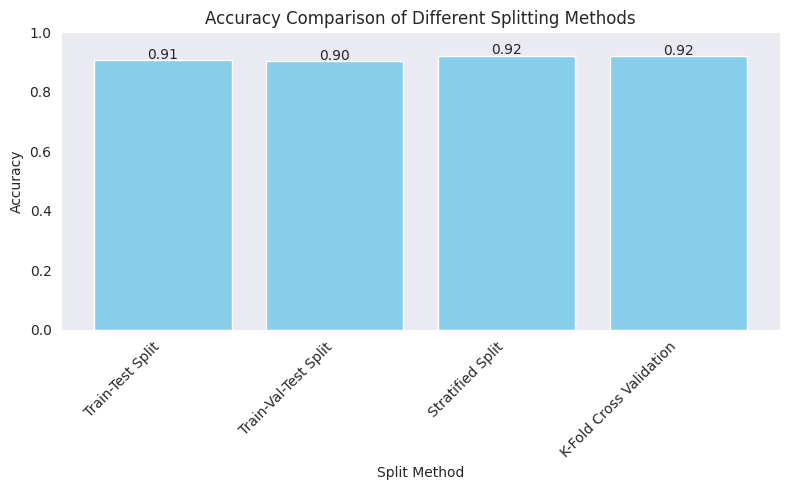

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
accuracy_3= test_accuracy
# Assuming you have these results already
results = {
    "Split Method": ["Train-Test Split", "Train-Val-Test Split", "Stratified Split", "K-Fold Cross Validation"],
    "Accuracy": [accuracy_1, accuracy_3, accuracy_2, accuracy_4]  # Replace these with your actual values
}

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Print the results for clarity
print("Accuracy Comparison:")
print(results_df)

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(results_df["Split Method"], results_df["Accuracy"], color="skyblue")
plt.title("Accuracy Comparison of Different Splitting Methods")
plt.ylabel("Accuracy")
plt.xlabel("Split Method")
plt.ylim(0, 1)  # Accuracy range (0 to 100%)
plt.xticks(rotation=45, ha='right')
for i, acc in enumerate(results["Accuracy"]):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#### Visualizing Decision Tree

##### Method 1

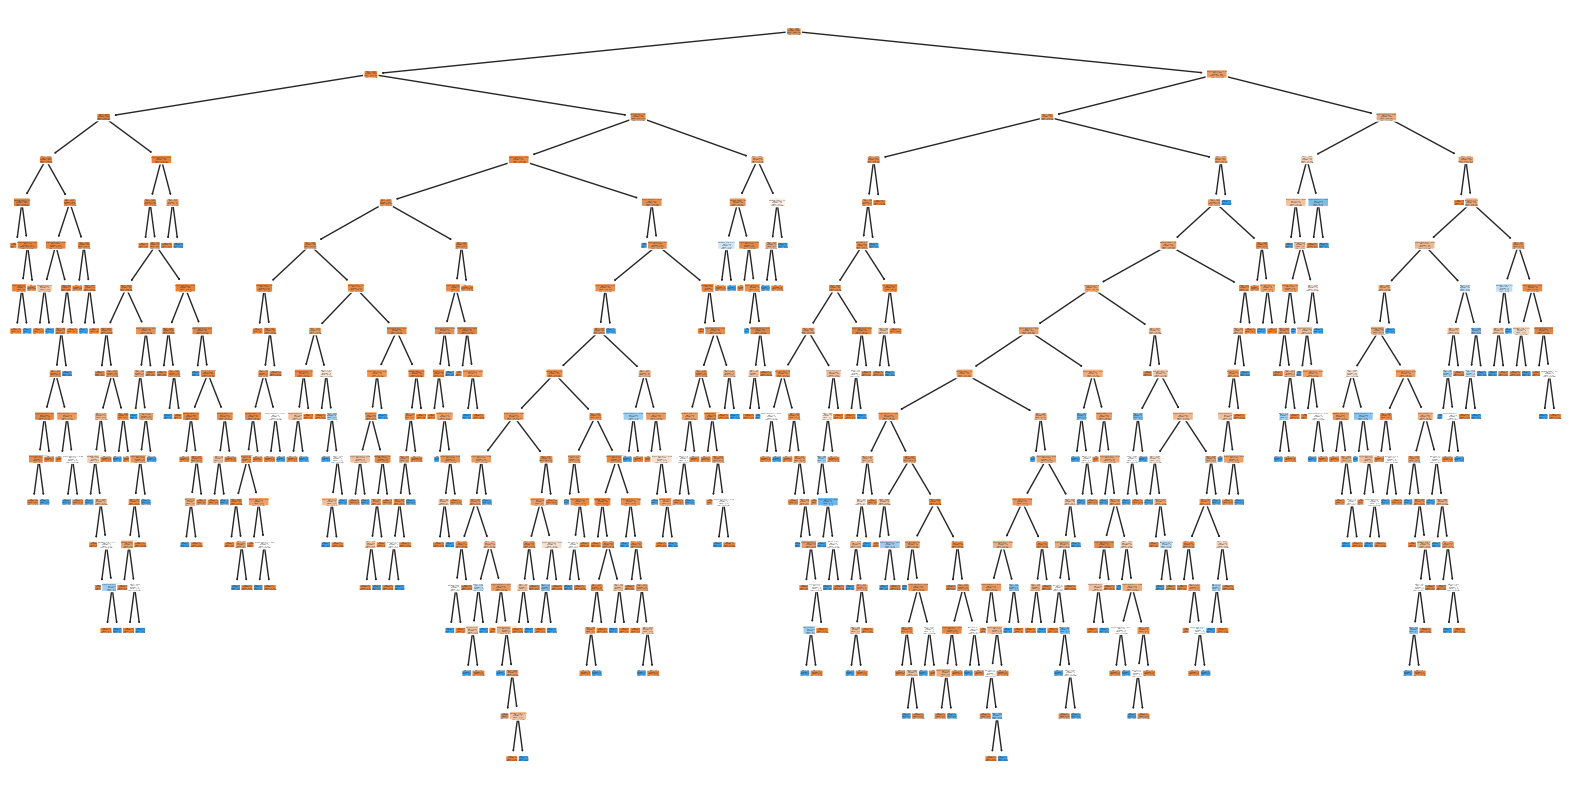

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(clf,
          feature_names=X.columns,  # Feature names from your dataset
          class_names=['No Stroke', 'Stroke'],  # Class names
          filled=True,  # Fill nodes with colors
          rounded=True)  # Rounded edges for better visualization
plt.show()


##### Saving Tree as pdf

In [ ]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the Decision Tree to a DOT format
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['No Stroke', 'Stroke'],
                           filled=True,
                           rounded=True)

# Render the DOT file as an image
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as 'decision_tree.pdf'

# Display the tree directly in Colab
graph.view()




'decision_tree.pdf'

In [ ]:
import joblib

# Save the model to a file
joblib.dump(clf, 'decision_tree_model.pkl')

print("Model saved as 'decision_tree_model.pkl'")


Model saved as 'decision_tree_model.pkl'
